# TOC   
1. Importing libraries & data   
2. Removing non-quantitative data   
3. Standardizing data in new dataframe  
4. Creating k-clusters   
5. Graphing & Analysis   


In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# Importing data

path = r'C:\Users\Ryzen RGB Madness!!!\Iowa Liquor Sales Analysis'

In [3]:
liquor_data_complete = pd.read_pickle(os.path.join(path, '01 - Data', 'Cleaned', 'iowa_sales_location_population.pkl'))

In [4]:
liquor_data_complete.shape

(12537543, 26)

In [5]:
liquor_data_complete.columns

Index(['invoice_number', 'date', 'store_number', 'store_name', 'address',
       'city', 'zip_code', 'latitude', 'longitude', 'county_fips', 'county',
       'population', 'category', 'category_name', 'vendor_number',
       'vendor_name', 'item_number', 'item_description', 'pack',
       'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale_dollars', 'volume_sold_liters',
       'volume_sold_gallons'],
      dtype='object')

In [6]:
# Dropping non-quantitative columns

LDC_quant =  liquor_data_complete.drop(columns=['invoice_number', 'date', 'store_number', 'store_name', 'address',
       'city', 'zip_code', 'latitude', 'longitude', 'county_fips', 'county',
       'category', 'category_name', 'vendor_number', 'vendor_name', 'item_number', 'item_description', 'pack'])

In [7]:
LDC_quant.shape

(12537543, 8)

In [8]:
LDC_quant.describe()

,population,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,1.253754e+07,1.253754e+07,1.253754e+07,1.253754e+07,1.253754e+07,1.253754e+07,1.253754e+07,1.253754e+07
mean,1.622153e+05,8.495272e+02,1.100411e+01,1.650806e+01,1.146606e+01,1.544963e+02,9.310478e+00,2.454631e+00
std,1.738753e+05,5.243447e+02,1.204841e+01,1.807231e+01,3.325119e+01,5.443291e+02,3.938240e+01,1.040391e+01
min,3.654000e+03,2.000000e+01,3.300000e-01,5.000000e-01,-3.600000e+02,-9.720000e+03,-6.300000e+02,-1.664200e+02
25%,2.253500e+04,6.000000e+02,5.780000e+00,8.670000e+00,3.000000e+00,3.825000e+01,1.500000e+00,3.900000e-01
50%,9.932800e+04,7.500000e+02,8.740000e+00,1.311000e+01,6.000000e+00,8.100000e+01,4.800000e+00,1.260000e+00
75%,2.296340e+05,1.000000e+03,1.350000e+01,2.025000e+01,1.200000e+01,1.616400e+02,1.050000e+01,2.770000e+00
max,4.972540e+05,6.000000e+03,1.843600e+04,2.765400e+04,1.320000e+04,2.795573e+05,1.320000e+04,3.487070e+03


In [9]:
#Standardizing dataframe data

LDC_QS = (LDC_quant-LDC_quant.mean())/LDC_quant.std()

In [10]:
LDC_QS.shape

(12537543, 8)

In [11]:
LDC_QS.describe()

,population,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,1.253754e+07,1.253754e+07,1.253754e+07,1.253754e+07,1.253754e+07,1.253754e+07,1.253754e+07,1.253754e+07
mean,-5.716286e-17,-1.502520e-17,3.943186e-16,-9.186681e-16,1.636439e-17,-7.441418e-17,-1.572783e-16,2.101159e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.119258e-01,-1.582027e+00,-8.859351e-01,-8.857782e-01,-1.117151e+01,-1.814067e+01,-1.623340e+01,-1.623184e+01
25%,-8.033365e-01,-4.758840e-01,-4.335935e-01,-4.337053e-01,-2.546092e-01,-2.135588e-01,-1.983240e-01,-1.984475e-01
50%,-3.616808e-01,-1.898126e-01,-1.879180e-01,-1.880255e-01,-1.643868e-01,-1.350218e-01,-1.145303e-01,-1.148251e-01
75%,3.877415e-01,2.869730e-01,2.071547e-01,2.070540e-01,1.605784e-02,1.312389e-02,3.020440e-02,3.031259e-02
max,1.926891e+00,9.822685e+00,1.529247e+03,1.529273e+03,3.966334e+02,5.132975e+02,3.349387e+02,3.349332e+02


In [12]:
# Using the elbow technique to discover optimal clusters

num_cl =  range(1,20)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [13]:
score = [kmeans[i].fit(LDC_QS).score(LDC_QS) for i in range(len(kmeans))]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

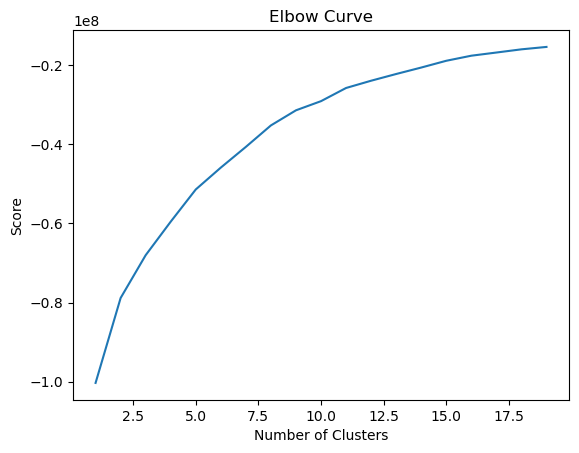

In [14]:
# Plotting elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Given this chart (and after some trial and error as far as possible clusters were concerned), I'm going to go with 8 clusters. 

In [15]:
# K-means Clustering

kmeans = KMeans(n_clusters = 8) 

In [16]:
kmeans.fit(LDC_QS)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [17]:
LDC_QS['clusters'] = kmeans.fit_predict(LDC_QS)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
LDC_QS['clusters'].value_counts()

clusters
0    7542005
5    2199559
3    1928205
1     738825
2     110543
7      17360
4        920
6        126
Name: count, dtype: int64

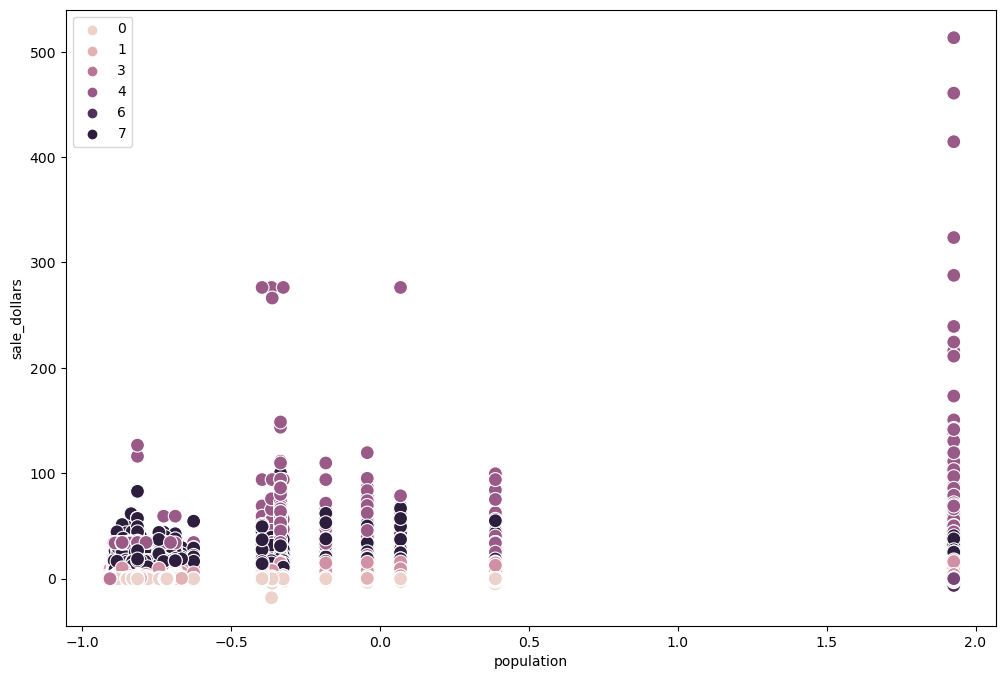

In [19]:
# Plotting variables for sale dollars & population

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=LDC_QS['population'], y=LDC_QS['sale_dollars'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('population') 
plt.ylabel('sale_dollars')
plt.show()

ANALYSIS

I was wondering if I'd see something different here after the bust with regression, but it doesn't appear so. The LARGEST sales are in the highest population counties, but other than that, nothing in particular is coming out of this. 

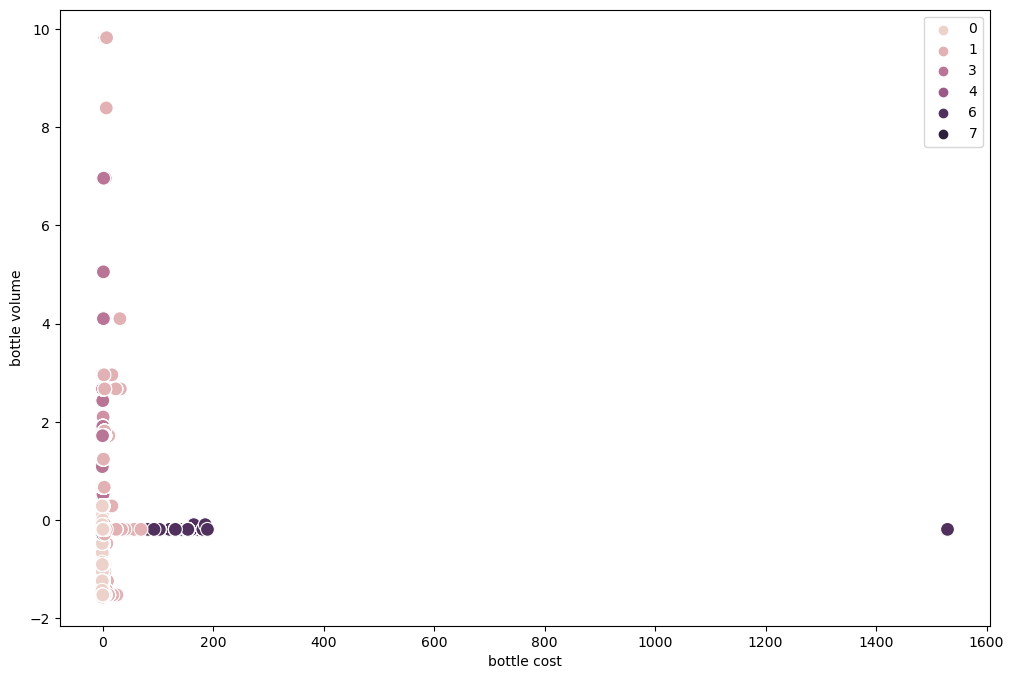

In [20]:
# Plotting variables for sale dollars & population

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=LDC_QS['state_bottle_cost'], y=LDC_QS['bottle_volume_ml'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('bottle cost') 
plt.ylabel('bottle volume')
plt.show()

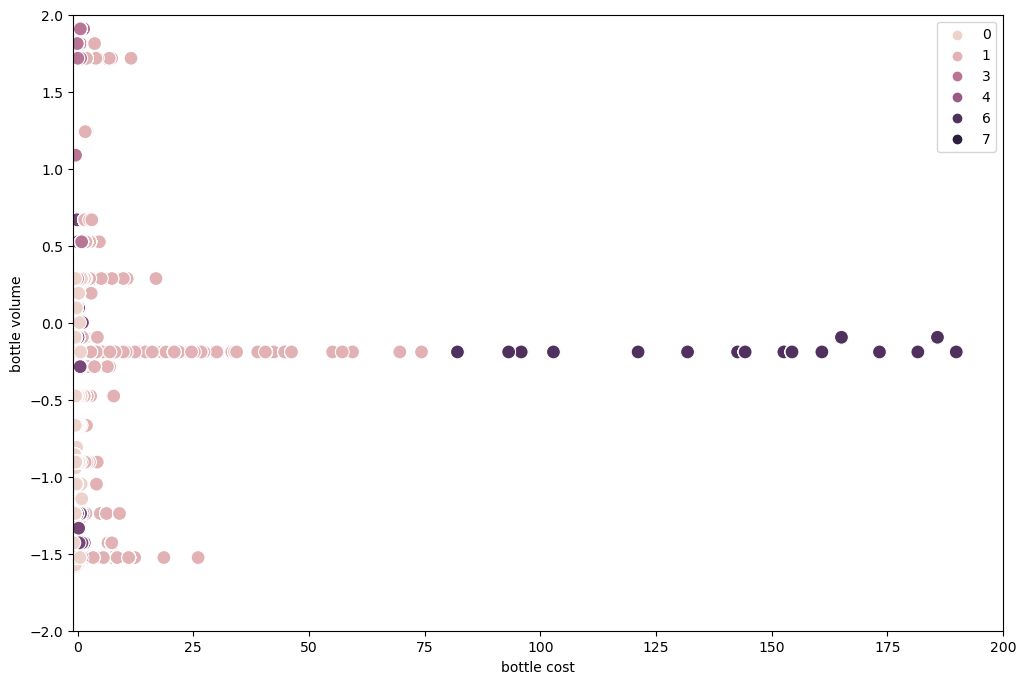

In [21]:
# Examining a certain part of the chart for sale dollars & population

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=LDC_QS['state_bottle_cost'], y=LDC_QS['bottle_volume_ml'], hue=kmeans.labels_, s=100) 
ax.set_xlim([-1, 200])
ax.set_ylim([-2, 2])
ax.grid(False)
plt.xlabel('bottle cost') 
plt.ylabel('bottle volume')
plt.show()

ANALYSIS

Cluster 6 looks like it's more of the high end stuff for the most common bottle size, and clusters 0 and 2 are definitely the least expensive. 

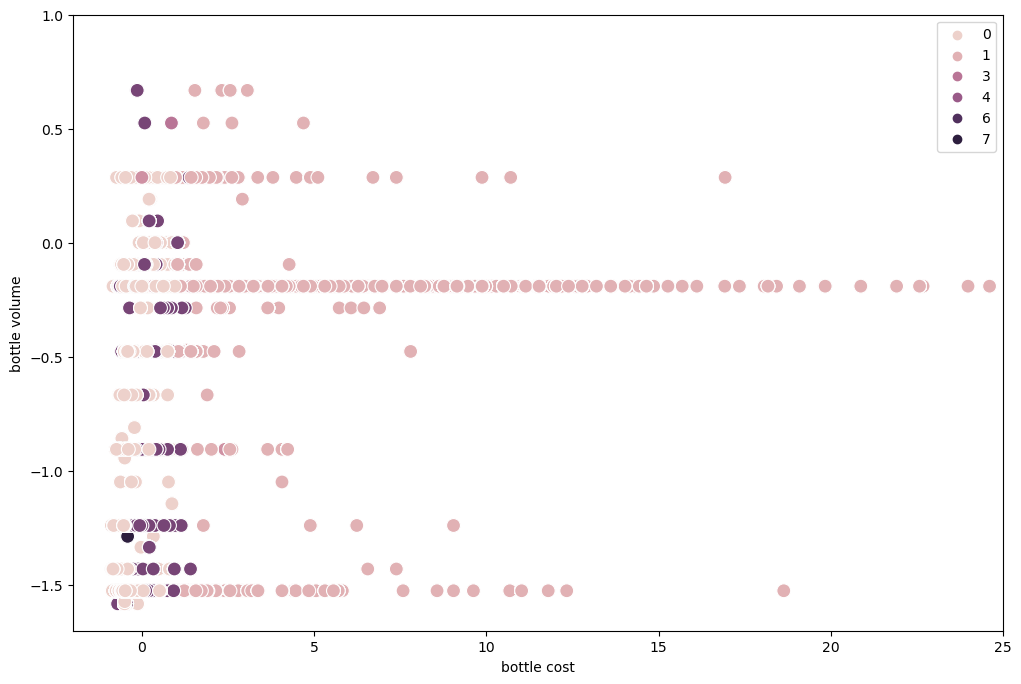

In [22]:
# Zooming in a little bit more 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=LDC_QS['state_bottle_cost'], y=LDC_QS['bottle_volume_ml'], hue=kmeans.labels_, s=100) 
ax.set_xlim([-2, 25])
ax.set_ylim([-1.7, 1])
ax.grid(False)
plt.xlabel('bottle cost') 
plt.ylabel('bottle volume')
plt.show()

OBSERVATIONS

It appears that cluster 0 is under $5 (well, what that translates out to in terms of non-standardized data). That could be very interesting when looking at some of the other graphs.

In [23]:
LDC_QS.columns

Index(['population', 'bottle_volume_ml', 'state_bottle_cost',
       'state_bottle_retail', 'bottles_sold', 'sale_dollars',
       'volume_sold_liters', 'volume_sold_gallons', 'clusters'],
      dtype='object')

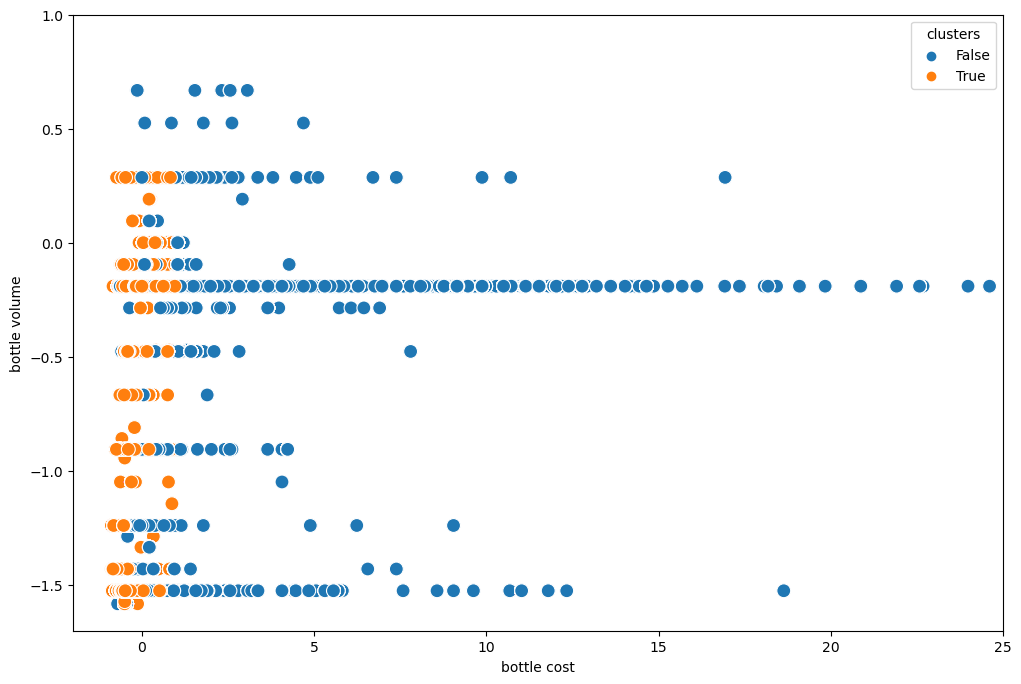

In [28]:
# Filtering to lowest-cost cluster (0)

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=LDC_QS['state_bottle_cost'], y=LDC_QS['bottle_volume_ml'], hue=LDC_QS['clusters'].isin([0]), s=100) 
ax.set_xlim([-2, 25])
ax.set_ylim([-1.7, 1])
ax.grid(False)
plt.xlabel('bottle cost') 
plt.ylabel('bottle volume')
plt.show()

I wasn't quite sure how the filter was going to render but THIS is very interesting. I learned something new and it actually makes it easier to see where those clusters are at. 

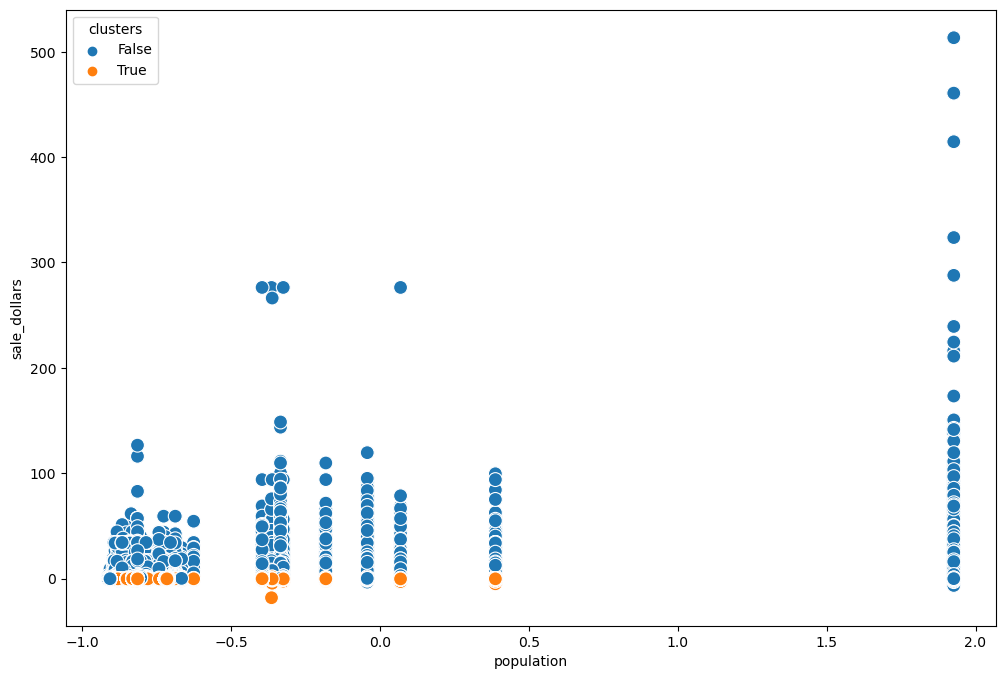

In [49]:
# Any concentration of that lowest cluster here? 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=LDC_QS['population'], y=LDC_QS['sale_dollars'], hue=LDC_QS['clusters'].isin([0]), s=100) 
ax.grid(False)
plt.xlabel('population') 
plt.ylabel('sale_dollars')
plt.show()

OBSERVATION

I don't know that that cluster shows as much with population and sales dollars. It's interesting that there isn't any of it in the highest population county and it does seem mainly clustered in the smaller counties, but there isn't as much of a pattern there as there is with that cluster and the bottle cost/bottle volume scatterplot. 

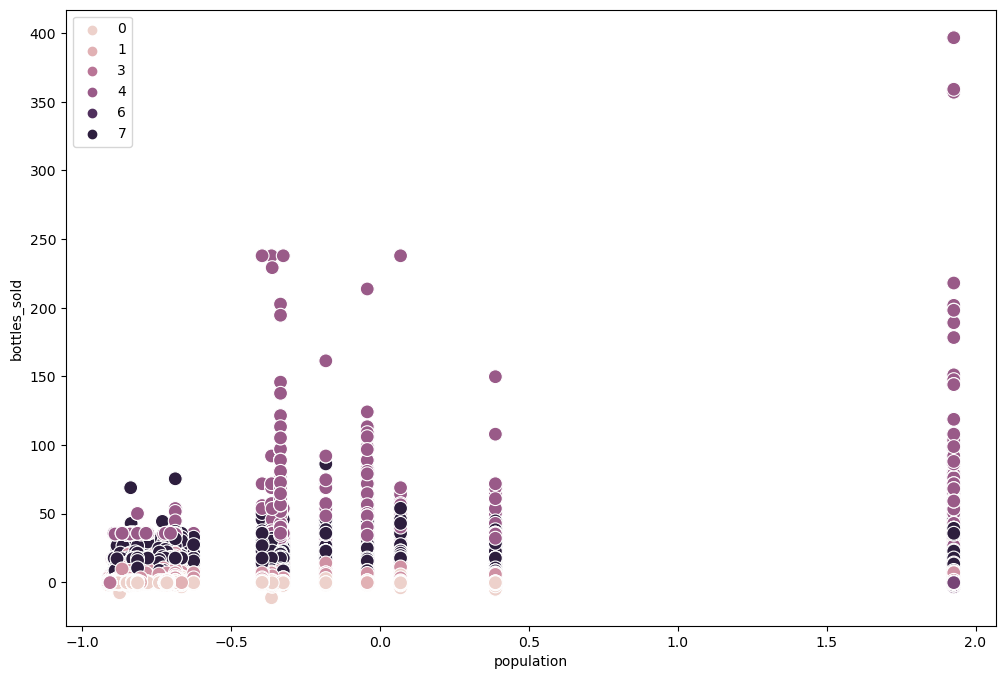

In [26]:
# Plotting variables for bottles sold & population

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=LDC_QS['population'], y=LDC_QS['bottles_sold'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('population') 
plt.ylabel('bottles_sold')
plt.show()

In [33]:
LDC_QS['clusters'].value_counts()

clusters
0    7542005
5    2199559
3    1928205
1     738825
2     110543
7      17360
4        920
6        126
Name: count, dtype: int64

In [43]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [44]:
LDC_QS.groupby(['clusters'])['population'].describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,7542005.00000,-0.43697,0.41660,-0.91193,-0.81806,-0.62544,-0.18161,0.38774
1,738825.00000,-0.04426,0.91696,-0.91193,-0.74206,-0.33374,0.06931,1.92689
2,110543.00000,0.36180,1.04375,-0.91193,-0.39562,-0.04250,1.92689,1.92689
3,1928205.00000,-0.49619,0.43538,-0.91193,-0.83545,-0.71129,-0.18161,1.92689
4,920.00000,0.07748,0.94986,-0.89291,-0.68718,-0.32911,0.06931,1.92689
5,2199559.00000,1.92689,0.00000,1.92689,1.92689,1.92689,1.92689,1.92689
6,126.00000,0.32013,1.12589,-0.89291,-0.72930,-0.04250,1.92689,1.92689
7,17360.00000,0.38177,1.08448,-0.89291,-0.39562,-0.04250,1.92689,1.92689


In [45]:
LDC_QS.groupby(['clusters'])['bottles_sold'].describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,7542005.00000,-0.04145,0.39686,-11.17151,-0.25461,-0.16439,0.01606,5.42940
1,738825.00000,-0.20425,0.16312,-1.78839,-0.31476,-0.25461,-0.16439,3.26406
2,110543.00000,4.22975,2.73841,0.85813,2.36184,3.26406,5.06851,28.52631
3,1928205.00000,-0.12650,0.19051,-1.42750,-0.16439,-0.16439,-0.16439,1.64006
4,920.00000,52.88327,40.24525,26.72187,35.20277,35.74410,56.85613,396.63343
5,2199559.00000,-0.02072,0.42042,-3.23195,-0.25461,-0.16439,0.01606,5.42940
6,126.00000,-0.31189,0.01677,-0.37491,-0.31476,-0.31476,-0.31476,-0.16439
7,17360.00000,13.64198,6.33608,3.26406,8.67740,11.20363,17.69964,86.26861


In [46]:
LDC_QS.groupby(['clusters'])['sale_dollars'].describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,7542005.00000,-0.08127,0.24365,-18.14067,-0.23009,-0.15508,-0.01091,4.34572
1,738825.00000,0.12461,0.46054,-3.32611,-0.14604,-0.02685,0.24515,12.61278
2,110543.00000,3.87320,2.80683,-0.09093,2.00449,3.27960,5.17243,31.95769
3,1928205.00000,-0.05957,0.21537,-2.06125,-0.16478,-0.11099,-0.03582,3.28754
4,920.00000,49.34397,47.34695,15.25030,30.80568,34.28349,51.54566,513.29750
5,2199559.00000,-0.03968,0.29949,-2.26726,-0.20943,-0.11849,0.01577,3.98197
6,126.00000,5.23733,4.77555,-6.48412,3.70988,4.87261,5.50019,50.51999
7,17360.00000,14.33308,8.21917,2.53799,8.16180,12.28871,17.57301,100.16091


In [47]:
LDC_QS.groupby(['clusters'])['state_bottle_cost'].describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,7542005.00000,-0.18740,0.39928,-0.88594,-0.49833,-0.25598,0.04116,1.45213
1,738825.00000,2.03743,1.66361,-0.08334,1.28613,1.57663,1.99162,74.32479
2,110543.00000,0.11137,0.65254,-0.88594,-0.33068,0.04531,0.54371,10.72140
3,1928205.00000,0.05742,0.42899,-0.54315,-0.28254,-0.04599,0.30343,4.46498
4,920.00000,-0.06010,0.30850,-0.58382,-0.22112,-0.04599,-0.04599,1.60402
5,2199559.00000,-0.10743,0.46616,-0.88594,-0.46347,-0.22776,0.14906,1.42225
6,126.00000,154.52116,127.49643,82.08515,121.12431,153.51363,165.08362,1529.24652
7,17360.00000,0.11203,0.52933,-0.83863,-0.25598,-0.04599,0.46362,9.87648


OBSERVATIONS    
I would like to run this with some of the categorical columns, and still may in a separate script.  I considered doing the counties, but from reading up on the one-hot encoding, it looks like that will add one column per county and Iowa has 100 counties. That would add 100 columns for the number of lines there are in my LDC_QS dataframe and that will be extremely large. I definitely want to add the one-hot encoding to my skillset, though.   

I'm also interested in singling out the clusters in some of these various scatterplots, though that sort of "look at this then look at that" granularity is possibly a little beyond the scope of this task (and the time I have for the remaining tasks). I do feel that that kind of comparison - seeing where one cluster is specifically grouped and then seeing what that cluster does in other scatterplots - could open up information that I may not otherwise have seen. 